In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sw = pd.read_csv('../input/Steven Wilson.csv') # Steven Wilson
pt = pd.read_csv('../input/Porcupine Tree.csv', nrows=len(sw)) # Porcupine Tree

# remove useless columns 
ignore = ['analysis_url', 'id', 'track_href', 'uri', 'type', 'album', 'name', 'artist', 'lyrics']
sw.drop(ignore, axis=1, inplace=True)
pt.drop(ignore, axis=1, inplace=True)

sw.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.00000
mean,0.374914,0.404456,0.259256,0.365532,0.423067,4.556962,0.182904,0.505781,0.607595,0.035892,0.669846,3.772152,0.15828
std,0.387124,0.134780,0.136725,0.228666,0.338993,3.407183,0.166785,0.149777,0.491406,0.007038,0.162130,0.598060,0.15229
min,0.000403,0.100000,0.089808,0.017300,0.000062,0.000000,0.058800,0.301507,0.000000,0.026300,0.246263,1.000000,0.02900
25%,0.012900,0.302000,0.181209,0.190000,0.048500,2.000000,0.088350,0.398259,0.000000,0.031400,0.573972,4.000000,0.04865
50%,0.195000,0.430000,0.216337,0.332000,0.417000,4.000000,0.104000,0.471709,1.000000,0.034400,0.689375,4.000000,0.10100
75%,0.805500,0.510000,0.326324,0.515000,0.749000,7.000000,0.214500,0.579397,1.000000,0.038550,0.778928,4.000000,0.22050
max,0.988000,0.620000,1.000000,0.849000,0.993000,11.000000,0.681000,1.000000,1.000000,0.070000,1.000000,5.000000,0.69600


In [11]:
# custom color palette 
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)

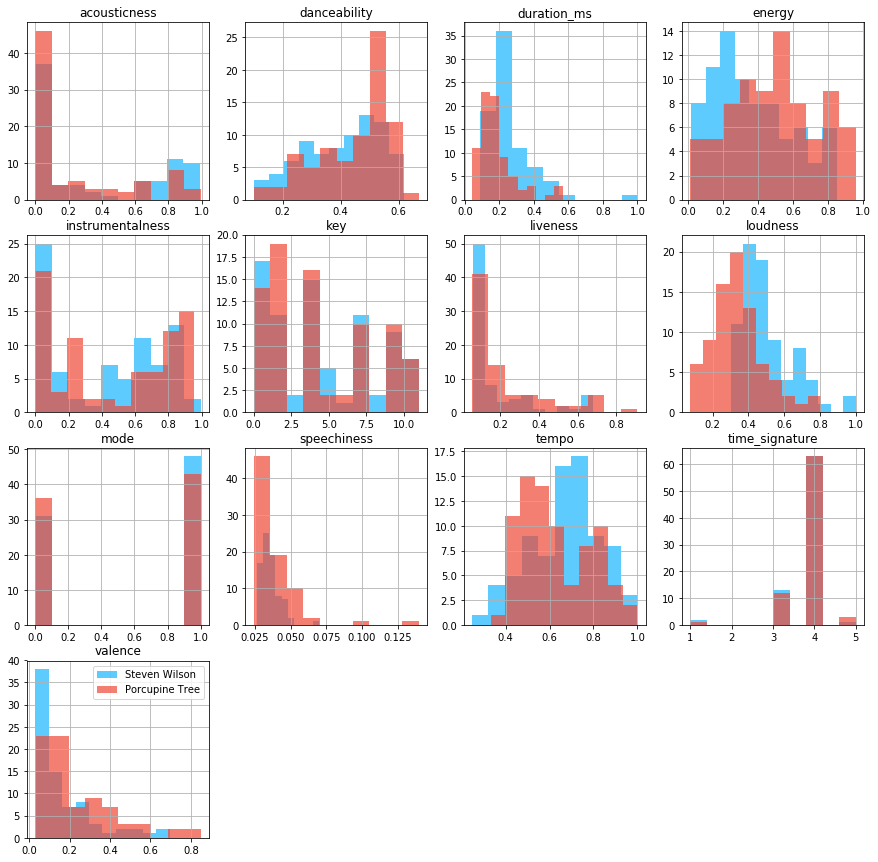

In [12]:
# let's compare the songs of SW and PT using histograms
fig = plt.figure(figsize=(15,15))

for i, feature in enumerate(sw):
    ax = plt.subplot(4,4,i+1)
    ax.set_title(feature)
    sw[feature].hist(alpha=0.7, label='Steven Wilson')
    pt[feature].hist(alpha=0.7, label='Porcupine Tree')
    
plt.legend(loc='upper right')

For full documentation on these features, go [here](https://developer.spotify.com/web-api/get-audio-features/).  
  
The reason I compared these two artists is because Steven Wilson used to be a member of Porcupine Tree, but he moved on and is now doing solo albums. However, their sound, style and genre are very similar. That's because Steven Wilson was Porcupine Tree's frontman, main writer and producer. He's really good at music production and his work is worshiped in the progressive rock scene. 

Anyways, I want to use a machine learning algorithm (specifically, a classifier) that tells me if a song is similar Wilson's style. So in order to build the classifier I have to train it with Wilson's songs. So, **The initial question was...** *should I use Porcupine Tree's songs as training data? *

Apparently, yes. 

There are a few differences though. Steven Wilson tends to be sadder (see *valence*), less energetic (see *energy*) and quieter (see *loudness*). Porcupine Tree used to be a little more noisy and energetic, I guess you could call them more "danceable".

Also, there are some tempo differences... PT is slower than SW. That's because early PT was more experimental. They had more psychodelic tracks, you know: ambient noises, echoes, electronics, people talking (see *speechiness*)... no instruments or lyrics at all. On the other hand, Steven Wilson's solo work is more traditional, he has more classic influences like *King Crimson* and *Yes*. That's why most of his tempos fall in the safe-120-area. Some even say that he just follows the "progressive rock blueprints", but let's not deviate...

These differences are not *that* significant though, it's normal for some songs to be kind of different from each other. Imagine an album where all the songs have the same valence, tempo and energy... that'd be very boring. 

There are major similarities between these two artists. Both are kind of sad and use chords in similar ways, i.e. minor and major chords (see *mode*). They like to use voiceovers in their songs (see *speechiness*), both follow the 4/4 "standard" measure. (see *time signature*). Both use the same musical notes in similar ways (see *key*). Finally, they are instrumentally related and you can *kind of* dance to both PT and SW.